In [2]:

import os
import sys
import numpy as np
import load_trace
import fixed_env as env


TRAIN_TRACES = '/root/repos/ABR-Starlink/src/train/'
all_cooked_time, all_cooked_bw, all_file_names,all_cooked_rtt = load_trace.load_trace(TRAIN_TRACES)

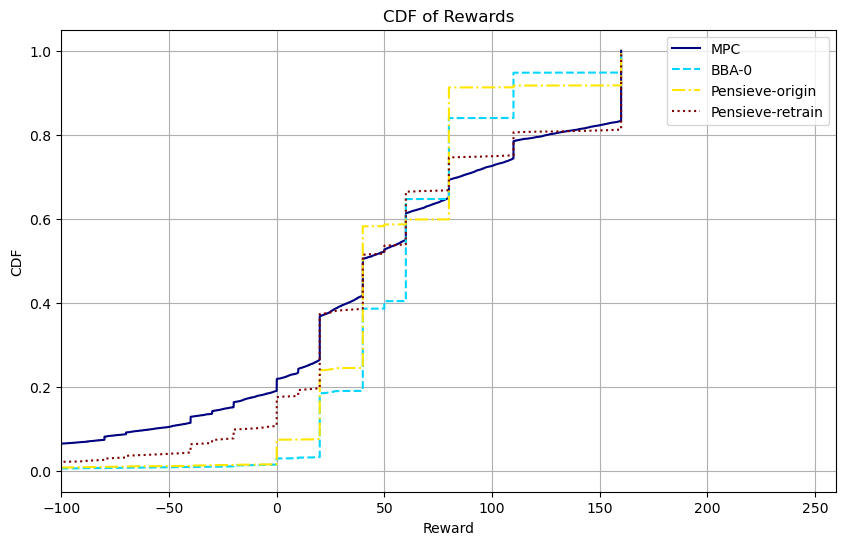

In [8]:
from cProfile import label
import os
import numpy as np
import matplotlib.pyplot as plt


LOG_FILE_PATH = "./test_results/"

log_file_paths = {
    "MPC": LOG_FILE_PATH + "mpc",
    "BBA-0": LOG_FILE_PATH + "bba-0",
    "Pensieve-origin": LOG_FILE_PATH + "Pensieve",
    "Pensieve-retrain": LOG_FILE_PATH + "Pensieve-retrain",
}


fig, ax = plt.subplots(figsize=(10, 6))
COLOR_MAP = plt.cm.jet
linestyles = ["-", "--", "-.", ":"]

for abr_policy, log_path in log_file_paths.items():
    all_rewards = []

    for filename in os.listdir(log_path):
        file_path = os.path.join(log_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, "r") as file:
                for line in file:
                    parts = line.strip().split()
                    if parts:
                        try:
                            reward = float(parts[7])
                            all_rewards.append(reward)
                        except ValueError:
                            continue

    sorted_rewards = np.sort(all_rewards)
    cdf_values = np.arange(1, len(sorted_rewards) + 1) / len(sorted_rewards)
    plt.plot(sorted_rewards, cdf_values, label=abr_policy)

colors = [COLOR_MAP(i) for i in np.linspace(0, 1, len(ax.lines))]
for i, j in enumerate(ax.lines):
    j.set_color(colors[i])
    j.set_linestyle(linestyles[i % len(linestyles)])


plt.xlabel("Reward")
plt.ylabel("CDF")
plt.xlim(-100, max(sorted_rewards) + 100)
plt.title("CDF of Rewards")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

LOG_FILE_PATH = "./test_results/"

log_file_paths = {"MPC": LOG_FILE_PATH + 'mpc', "BBA-0": LOG_FILE_PATH + 'bba-0'}
color_map = {"MPC": 'r', "BBA-0": 'b'}

plt.figure(figsize=(10, 6))


for abr_policy, log_path in log_file_paths.items():
    all_rewards = []

    for filename in os.listdir(log_path):
        file_path = os.path.join(log_path, filename)
        if os.path.isfile(file_path):
            with open(file_path, 'r') as file:
                for line in file:
                    parts = line.strip().split()
                    if parts:
                        try:
                            reward = float(parts[-1])
                            all_rewards.append(reward)
                        except ValueError:
                            continue

    sorted_rewards = np.sort(all_rewards)
    cdf_values = np.arange(1, len(sorted_rewards) + 1) / len(sorted_rewards)
    plt.plot(sorted_rewards, cdf_values, color=color_map[abr_policy], label=abr_policy)
plt.xlabel('Reward')
plt.ylabel('CDF')
plt.xlim(-100, max(sorted_rewards) + 100) 
plt.title('CDF of Rewards')
plt.grid(True)
plt.legend()
plt.show()